# 📊 OFLC Prediction Project using ML-Techniques

##  Project Overview
As part of the OFLC Prediction Project, I am conducting an exploratory data analysis to:
- Support H1-B visa certification processes through data-driven insights.
- Recommend suitable applicant profiles based on the key drivers that influence visa case statuses (Certified or Denied).

This notebook focuses on **Exploratory Data Analysis (EDA)** to uncover important trends and patterns that will guide future model development.

## 📚 Table of Contents
1. Data Loading and Overview
2. Data Cleaning and Preprocessing
3. Standardizing Wage Units
4. Univariate Analysis
5. Bivariate Analysis
6. Correlation Analysis
7. Handling Imbalanced Target in EDA
8. Feature Engineering Notes
9. Conclusion & Next Steps


## 1. 📥 Data Loading and Overview

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/Users/mac/Logistic Regression test/olfc-data.csv')

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
print("Dataset shape:", df.shape)
print(df.info())
print(df.describe())

Dataset shape: (25480, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
None
       no_of_employees   yr_of_estab  prevailing_wage
count     25480

## 2. 🧹 Data Cleaning and Preprocessing

In [8]:
#check for missing values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [9]:
df['education_of_employee'] = df['education_of_employee'].str.replace("’s", "", regex=False)
df['education_of_employee'] = df['education_of_employee'].str.replace("'s", "", regex=False)


In [10]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [11]:
df['prevailing_wage'] = df['prevailing_wage'].round(0).astype(int)

In [12]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592,Hour,Y,Denied
1,EZYV02,Asia,Master,Y,N,2412,2002,Northeast,83426,Year,Y,Certified
2,EZYV03,Asia,Bachelor,N,Y,44444,2008,West,122997,Year,Y,Denied
3,EZYV04,Asia,Bachelor,N,N,98,1897,West,83434,Year,Y,Denied
4,EZYV05,Africa,Master,Y,N,1082,2005,South,149907,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor,Y,Y,2601,2008,South,77093,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279175,Year,Y,Certified
25477,EZYV25478,Asia,Master,Y,N,1121,1910,South,146299,Year,N,Certified
25478,EZYV25479,Asia,Master,Y,Y,1918,1887,West,86155,Year,Y,Certified


## 3. 🧮 Standardizing Wage Units


In [21]:
df['unit_of_wage'].value_counts(normalize=True) * 100


unit_of_wage
Year     90.117739
Hour      8.465463
Week      1.067504
Month     0.349294
Name: proportion, dtype: float64

Most wages in the dataset are reported on an annual basis, but some are listed as hourly, weekly, or monthly.
To fairly compare all wages, we will convert everything to **annual salary equivalents** using standard multipliers.

In [24]:
# Define conversion multipliers
conversion_factors = {
    'Hour': 2080,       # 40 hours/week × 52 weeks/year
    'Week': 52,
    'Month': 12,
    'Year': 1
}

# Apply conversion to standardize wages to yearly
df['prevailing_wage'] = df.apply(
    lambda row: row['prevailing_wage'] * conversion_factors[row['unit_of_wage']], axis=1
)

# Standardize unit
df['unit_of_wage'] = 'Year'


In [25]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,1231360,Year,Y,Denied
1,EZYV02,Asia,Master,Y,N,2412,2002,Northeast,83426,Year,Y,Certified
2,EZYV03,Asia,Bachelor,N,Y,44444,2008,West,122997,Year,Y,Denied
3,EZYV04,Asia,Bachelor,N,N,98,1897,West,83434,Year,Y,Denied
4,EZYV05,Africa,Master,Y,N,1082,2005,South,149907,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor,Y,Y,2601,2008,South,77093,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279175,Year,Y,Certified
25477,EZYV25478,Asia,Master,Y,N,1121,1910,South,146299,Year,N,Certified
25478,EZYV25479,Asia,Master,Y,Y,1918,1887,West,86155,Year,Y,Certified


## 4. 📈 Univariate Analysis

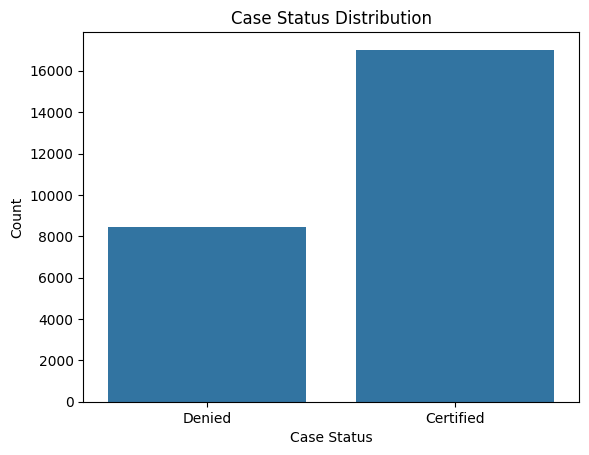

In [26]:
# Target variable distribution
sns.countplot(x='case_status', data=df)
plt.title('Case Status Distribution')
plt.xlabel('Case Status')
plt.ylabel('Count')
plt.show()


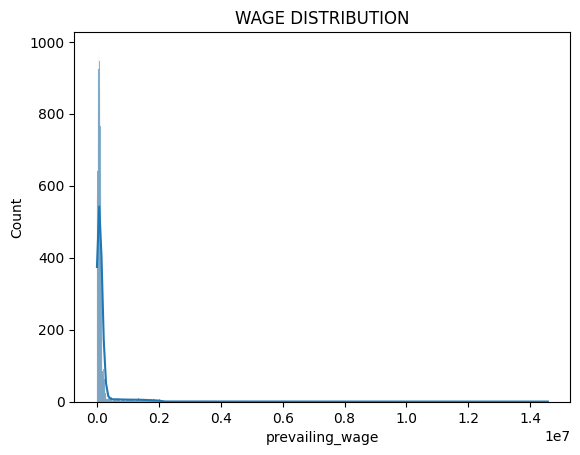

In [28]:
sns.histplot(df['prevailing_wage'], kde=True)
plt.title("WAGE DISTRIBUTION")
plt.xlabel("prevailing_wage")
plt.ylabel("Count")
plt.show()


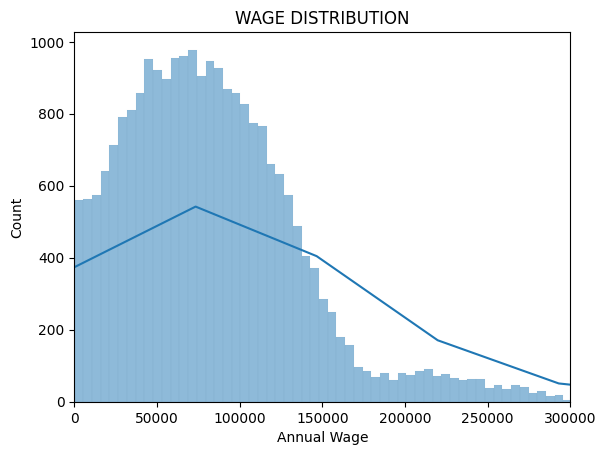

In [32]:
sns.histplot(df['prevailing_wage'], kde=True)
plt.title("WAGE DISTRIBUTION")
plt.xlabel("Annual Wage")
plt.xlim(0, 300000)
plt.show()


### 📊 Wage Distribution (Zoomed In View)

This histogram visualizes the distribution of annual prevailing wages, limited to $300,000 to exclude extreme outliers.

###  Key Observation

- Most job wages fall between **$40,000 and $150,000**, with a noticeable peak around **$60,000–$90,000**, suggesting this is the most common salary range for visa applicants.
- As wages increase above $150,000, the number of job records gradually decreases, confirming that **high-paying jobs are less frequent**.
- The distribution is **right-skewed**, with very few records beyond $200,000. This skewness was previously masked due to the presence of extreme outliers (some exceeding $1 million).
- By removing the influence of those outliers, this zoomed-in view provides a **clearer and more accurate picture** of wage trends across the majority of cases.

Insight:
This finding supports the use of **log transformation** during feature engineering to normalize wage data and reduce skew for better model performance.


## 5. 📊 Bivariate Analysis

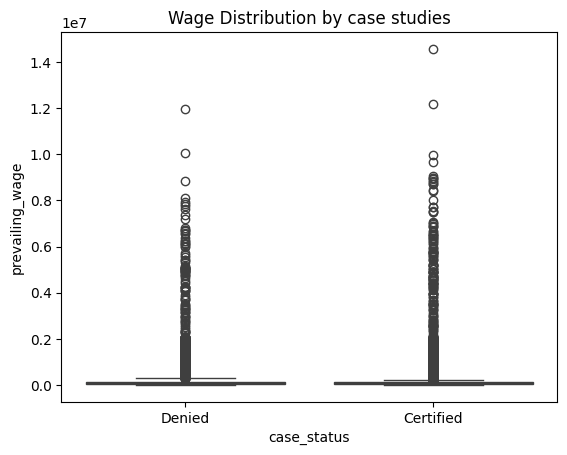

In [30]:
sns.boxplot(x ='case_status', y = 'prevailing_wage', data = df)
plt.title('Wage Distribution by case studies')
plt.show()

### 📊 Wage Distribution by Case Status (Original Scale)

This boxplot compares the distribution of annual prevailing wages across visa application outcomes (Certified vs Denied).

Key observations:
- Both Certified and Denied applications include **extremely high wage values**, some exceeding $1 million and even reaching **over $14 million**. These values significantly **distort the scale** of the plot.
- The **visible compression** at the bottom of each boxplot makes it hard to distinguish meaningful trends in the central wage range (e.g., $50k–$150k).
- The **median wages** of Certified and Denied cases are visually similar, suggesting that prevailing wage alone may not be a strong linear predictor of certification without transformation.
- These findings reinforce the need for **log transformation** or **outlier handling** during feature engineering to better expose wage trends.

Next Step:
We'll apply a log transformation during feature engineering to normalize the wage feature and reduce skew for better model performance.


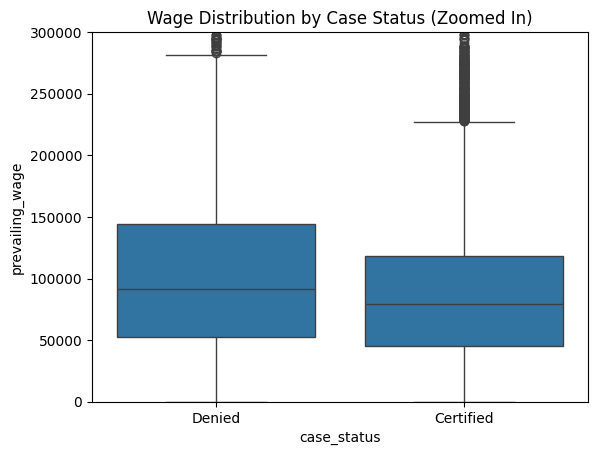

In [31]:
sns.boxplot(x='case_status', y='prevailing_wage', data=df)
plt.ylim(0, 300000)
plt.title('Wage Distribution by Case Status (Zoomed In)')
plt.show()


### Interpretation of Wage Rate Distribution by Case Status

- **Denied applicants** tend to earn slightly **higher wages on average** than certified applicants, based on the higher median in the denied group.
- **Wage variability** is wider among denied cases, suggesting rejections occur across a broad salary range — including mid and high-paying jobs.
- **Both certified and denied cases include high-wage outliers**, indicating that a high salary alone does not guarantee visa approval.
- The overlapping distributions and presence of low-wage cases in both groups suggest that **salary is not the sole driver** of approval.  factors such aAdditionals job type, experience, and education likely play a significant role.


#### 2. Does education level impact whether an application is certified or denied?

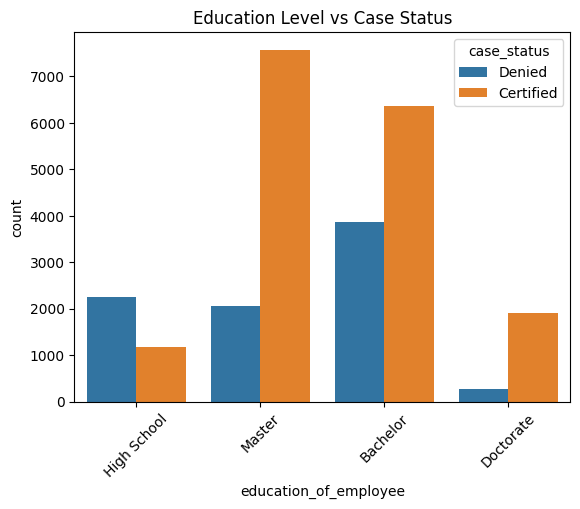

In [33]:

sns.countplot(x='education_of_employee', hue='case_status', data=df)
plt.title("Education Level vs Case Status")
plt.xticks(rotation=45)
plt.show()

### 📊 Education Level vs Case Status

This grouped bar chart shows the distribution of visa application outcomes (`Certified` vs `Denied`) across different education levels.

### Key Observation:

- **Master’s degree holders** represent the largest group of certified applicants, with significantly more approvals than denials. This suggests that a Master’s degree may **positively influence visa approval**.
- **Bachelor’s degree holders** also show a higher number of certified cases compared to denied ones.
- **Doctorate applicants**, while fewer in number, have a **strong skew toward certification**, which may reflect the higher perceived value of such qualifications in specialized roles.
- In contrast, applicants with only a **High School education** are more likely to be denied than certified, indicating that **lower education levels may reduce approval chances**.

📌 Insight:
Higher education levels — particularly **Master’s and Doctorate degrees** — appear to be strong indicators of visa certification, likely due to the alignment with highly skilled job roles.


#### 3. Does having prior job experience increase the chances of approval?


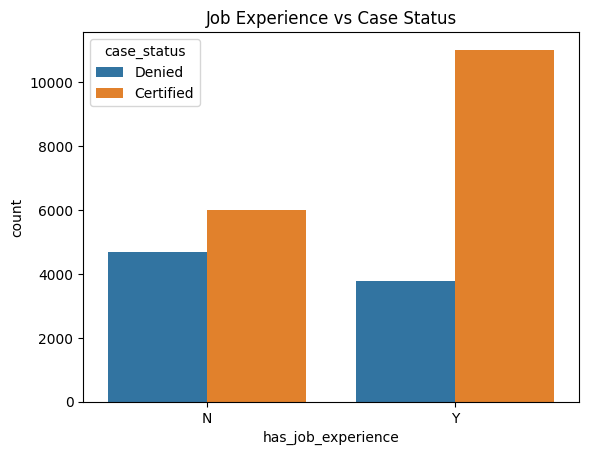

In [34]:
sns.countplot(x='has_job_experience', hue='case_status', data=df)
plt.title("Job Experience vs Case Status")
plt.show()

### 📊 Job Experience vs Case Status

This bar chart compares the number of Certified and Denied visa applications based on whether the applicant had previous job experience (`Y` for Yes, `N` for No).

### Key Observation:

- Applicants **with job experience (Y)** have a significantly **higher number of certified cases** compared to denied cases — nearly **three times more certifications**.
- In contrast, applicants **without job experience (N)** have a **smaller certification margin** and a relatively **higher proportion of denials**.
- The gap between certified and denied cases is much **wider for experienced applicants**, highlighting that prior job experience is a **strong positive signal** for visa approval.

Insight:
Having job experience appears to be an **important factor influencing visa certification**, likely because it aligns with the visa requirement for qualified, skilled workers.


#### 4. Is job training required more for denied cases?

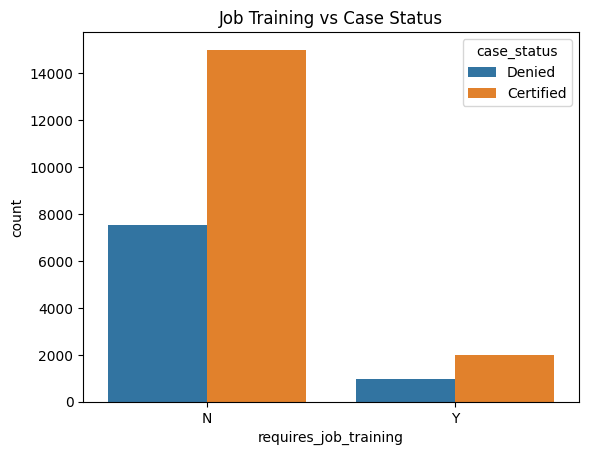

In [35]:
sns.countplot(x='requires_job_training', hue='case_status', data=df)
plt.title("Job Training vs Case Status")
plt.show()

### 📊 Job Training vs Case Status

This bar chart shows the distribution of visa certification outcomes for applicants based on whether their job role required additional training (`Y` for Yes, `N` for No).

### Key observation:

- The **majority of visa applications** do **not require job training**, and within this group, certified cases **significantly outnumber** denied ones.
- For applications that **require job training**, the number of **certified cases is only slightly higher** than denied ones — and both values are relatively low.
- This suggests that jobs requiring additional training **may face slightly higher scrutiny** or represent more complex roles with tighter approval criteria.
- However, since most applications fall into the “No training required” category, this variable may not be a **strong driver** of case status on its own.

 Insight:
Job training requirements show a **mild association** with certification outcomes, but the effect is not as strong or distinct as features like job experience or education.
Further analysis may be needed to evaluate this in combination with other factors (e.g., training + wage or training + job type).


#### 5. How does full-time vs part-time status affect visa outcomes?

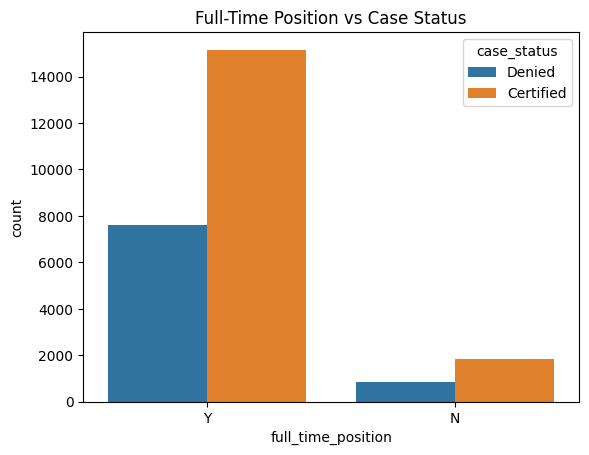

In [36]:
sns.countplot(x='full_time_position', hue='case_status', data=df)
plt.title("Full-Time Position vs Case Status")
plt.show()

### 📊 Full-Time Position vs Case Status

This bar chart displays visa outcomes based on whether the job position offered was full-time (`Y`) or not (`N`).

### Key observation:

- **Full-time positions (Y)** account for the vast majority of applications. Among them, **certified cases significantly outnumber denied ones**, indicating a strong positive association with visa approval.
- For **non-full-time roles (N)**, both certified and denied counts are relatively low, but the approval margin is much smaller — suggesting **part-time or contract roles are less likely to be approved**.
- The sharp contrast in certification rates between full-time and non-full-time roles highlights that **job structure is a key consideration** in visa decision-making.

Insight:
Applicants being offered full-time positions have a clear advantage when it comes to certification. This aligns with visa policies that prioritize **stable, long-term employment opportunities**.


#### 6. Which regions of employment have the highest approval rates?

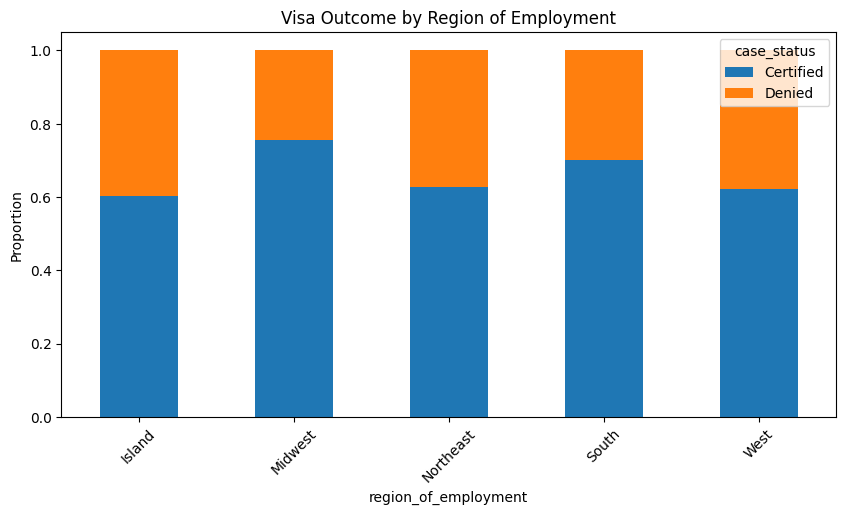

In [37]:
region_stats = df.groupby('region_of_employment')['case_status'].value_counts(normalize=True).unstack()
region_stats.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Visa Outcome by Region of Employment")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()

### 📊 Visa Outcome by Region of Employment

This stacked bar chart shows the proportion of visa approvals (Certified) and denials (Denied) across different U.S. employment regions.

###  Key Observation:

- The **Midwest** region stands out with the **highest approval rate**, with over 75% of applications certified — the strongest outcome of all regions.
- The **South** also has a relatively high certification rate, followed by the **Northeast** and **West**, which are fairly balanced with just over 60% approvals.
- The **Island** region (likely U.S. territories) has the **lowest certification proportion**, with nearly **40% of applications denied** — the highest denial rate across all regions.
- These differences suggest that **regional economic or policy factors** may influence visa decision outcomes.

Insight:
Employment region may be a **moderate factor** in visa certification, with the Midwest emerging as the most favorable location, while Island regions face higher rejection rates. Further analysis could combine region with job type or wage to reveal deeper patterns.


#### 7. Is there a difference in approval based on continent of the applicant?

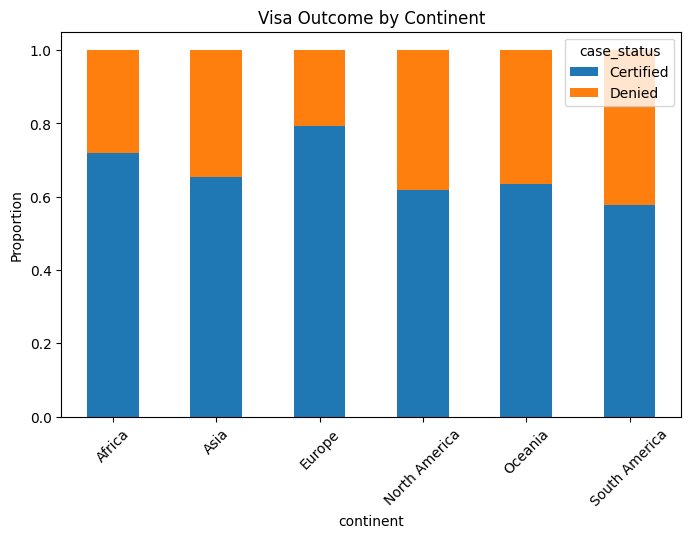

In [38]:
continent_stats = df.groupby('continent')['case_status'].value_counts(normalize=True).unstack()
continent_stats.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Visa Outcome by Continent")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()

### 📊 Visa Outcome by Continent

This stacked bar chart displays the proportion of Certified and Denied visa applications across different applicant continents.

### Key Observation:

- **Europe** leads with the highest certification rate — approximately **80%** of European applicants were approved.
- **Africa** also performs strongly with a certification rate over **70%**, showing a favorable outcome for many applicants from the continent.
- **Asia**, **Oceania**, and **North America** have moderately high approval rates (~63–65%), with balanced certification-to-denial ratios.
- **South America** has the **lowest certification rate**, with just under **60%** of applications approved, indicating a slightly higher rejection pattern.

 Insight:
While the majority of applicants across all continents get certified, **Europe and Africa stand out with stronger approval ratios**, whereas **South America appears to face more visa challenges**. Continent-level differences may reflect underlying factors such as economic background, job categories, or policy preferences.


#### 8. Do some continents or regions face more denials regardless of other factors?

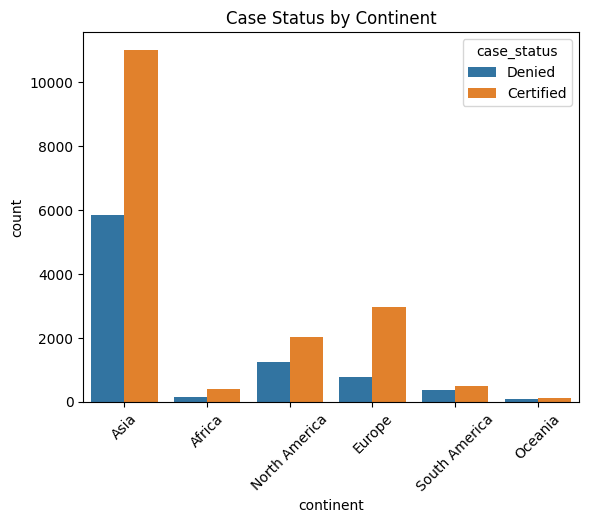

In [39]:
sns.countplot(x='continent', hue='case_status', data=df)
plt.title("Case Status by Continent")
plt.xticks(rotation=45)
plt.show()

### 📊 Case Status by Continent (Absolute Counts)

This grouped bar chart displays the **actual number of visa applications** from each continent, broken down by Certified and Denied outcomes.

### Key Observation:

- **Asia** dominates the dataset with the **highest number of applications by far**, followed by **Europe** and **North America**. This explains why Asian applicants contribute significantly to overall certification trends.
- **Asia also has the highest number of denials**, though certifications still outweigh them, suggesting mixed outcomes possibly due to varied job types or applicant profiles.
- **Europe and North America** have more certified than denied cases, reflecting strong approval performance among moderate-volume continents.
- **Africa**, **South America**, and **Oceania** contribute fewer applications overall, but still show **consistently higher certification counts** than denials.

 Insight:
Asia’s volume greatly influences global visa trends, while smaller continents maintain **high approval rates despite fewer applications**. 


#### 9. What’s the average prevailing wage for certified vs denied cases?

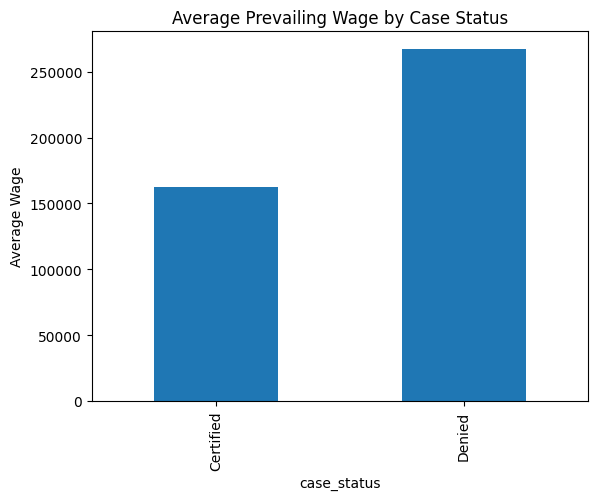

In [40]:
df.groupby('case_status')['prevailing_wage'].mean().plot(kind='bar')
plt.title("Average Prevailing Wage by Case Status")
plt.ylabel("Average Wage")
plt.show()

### 📊 Average Prevailing Wage by Case Status

This bar chart compares the **average annual prevailing wage** for Certified versus Denied visa applications.

### Key Observation:

- Interestingly, **denied applications have a significantly higher average wage** compared to certified ones.
- This challenges the common assumption that **higher salaries automatically increase approval chances**.
- The result may be due to:
  - **Data anomalies or outliers** — especially extreme wages from hourly-to-yearly conversions.
  - **Misclassification of job roles** or **unrealistic wage expectations** that raise red flags during review.
  - The possibility that **mid-range wage offers are more aligned** with policy standards and job market benchmarks.

📌 Insight:
This visualization confirms what earlier boxplots hinted — **wage alone does not guarantee certification**, and in fact, **excessively high wages may be associated with more rejections**. This makes a strong case for applying **log transformation** and removing extreme outliers during feature engineering.


#### 10.  Do more established companies have better approval rates?

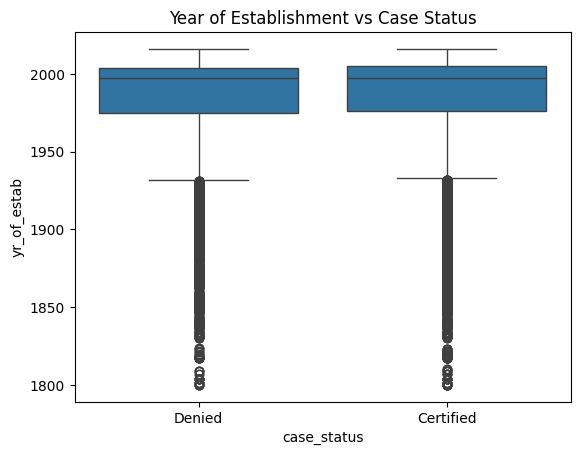

In [42]:
sns.boxplot(x='case_status', y='yr_of_estab', data=df)
plt.title("Year of Establishment vs Case Status")
plt.show()

### 📊 Year of Establishment vs Case Status

This boxplot compares the distribution of the employer's **year of establishment** between Certified and Denied visa applications.

### Interpretation:

- The **median year of establishment** is roughly the same for both Certified and Denied applications — around the early 2000s.
- Most of the data is concentrated between **1990 and 2020**, indicating that the majority of employers are relatively modern companies.
- Both categories contain **extreme outliers** on the lower end — with some companies established as far back as the 1800s — but these cases are few.
- There's **no substantial difference in the year of establishment** between the two case statuses, suggesting that **company age is not a strong predictor** of visa approval.

Insight:
While employer age spans a wide range, its influence on visa certification appears **minimal** based on this distribution. It may still be useful when combined with other features (e.g. company size or wage) but on its own, it doesn’t drive decision outcomes.


#### 11. How does the number of employees relate to visa certification?

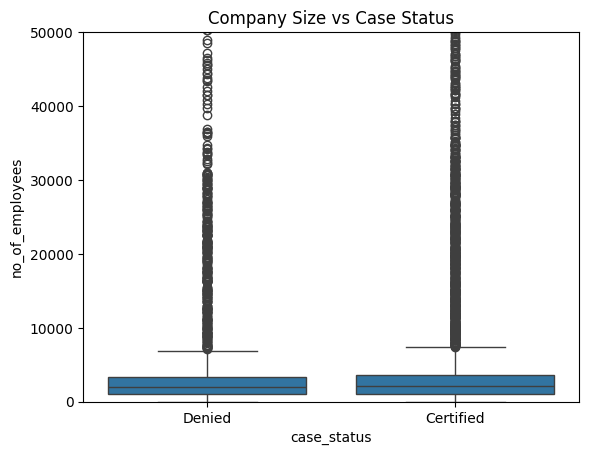

In [43]:
sns.boxplot(x='case_status', y='no_of_employees', data=df)
plt.title("Company Size vs Case Status")
plt.ylim(0, 50000)  # Adjust based on data scale
plt.show()

### 📊 Company Size vs Case Status

This boxplot compares the distribution of company sizes (`no_of_employees`) for both Certified and Denied visa applications.

### Key Observation:

- The distribution of company size is **very similar** for both Certified and Denied cases, with most companies falling below **5,000 employees**.
- There are many **extreme outliers** — companies with employee counts exceeding **50,000** — but they are rare and appear in both case outcomes.
- The **median number of employees** is nearly identical for both certified and denied applications, indicating **no significant impact** of company size on visa approval.
- This suggests that both **large and small companies** have roughly equal chances of having applications certified.

 Insight:
While larger employers are present in the dataset, **company size does not appear to play a major role** in determining visa outcomes. 

#### 13. What features are most correlated with visa approval?

In [44]:
# Encode case_status
encoded_df = df.copy()
encoded_df['case_status_bin'] = encoded_df['case_status'].map({'Certified': 1, 'Denied': 0})


## 6. Correlation Analysis


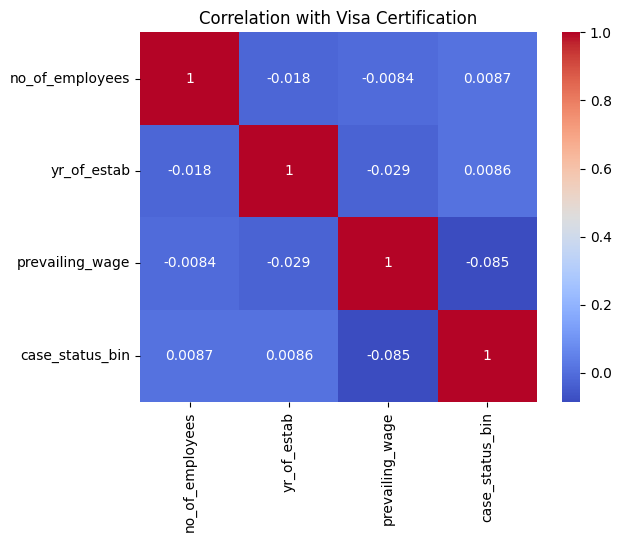

In [46]:
sns.heatmap(encoded_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation with Visa Certification")
plt.show()

### 📊 Correlation with Visa Certification

This heatmap shows the Pearson correlation coefficients between numeric features and the binary case status (1 = Certified, 0 = Denied).

###  Interpretation:

- All features show **very weak linear correlation** with `case_status_bin`:
  - `prevailing_wage` has a slightly negative correlation (-0.085), meaning higher wages are mildly associated with denial.
  - `no_of_employees` and `yr_of_estab` are nearly uncorrelated with visa outcome.
- This suggests that **no single numeric feature strongly influences the visa decision** when considered in isolation.
- However, non-linear relationships or feature interactions (e.g. wage * full-time status) may still exist — and will be better captured by machine learning models.

 Insight:
The weak correlations reinforce the need for **feature engineering**, **interaction terms**, and **modeling approaches** beyond linear assumptions to better capture the drivers of visa certification.


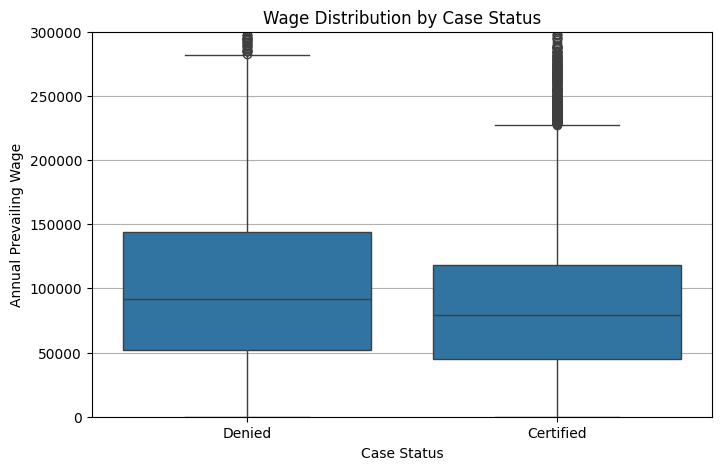

case_status
Certified    162716.58
Denied       267128.55
Name: prevailing_wage, dtype: float64

In [49]:
# Plot wage distribution by case status (Zoomed in)
plt.figure(figsize=(8, 5))
sns.boxplot(x='case_status', y='prevailing_wage', data=df)
plt.ylim(0, 300000)  # Limit y-axis to remove extreme outliers
plt.title("Wage Distribution by Case Status")
plt.xlabel("Case Status")
plt.ylabel("Annual Prevailing Wage")
plt.grid(True)
plt.show()

# Summary: average wages by case status
avg_wages = df.groupby('case_status')['prevailing_wage'].mean().round(2)
avg_wages


## 📋 Final EDA Insights Summary Table

This table summarizes key findings from the Exploratory Data Analysis (EDA) conducted on the visa application dataset.

| **Feature**             | **Type**       | **Key Findings**                                                                                                                                     |
|-------------------------|----------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Education Level**     | Categorical    | Master's and Bachelor's degree holders have higher certification rates. High School applicants face higher rejection.                              |
| **Job Experience**      | Categorical    | Prior job experience is strongly associated with certification. Most applicants with experience were approved.                                     |
| **Job Training**        | Categorical    | Majority of certified applicants did not require job training. Training appears to slightly lower approval probability.                             |
| **Full-Time Position**  | Categorical    | Full-time roles are significantly more likely to be approved. Part-time positions show higher rejection.                                            |
| **Region of Employment**| Categorical    | Midwest has the highest approval rate. Island regions have the lowest.                                                                              |
| **Continent**           | Categorical    | Europe and Africa show the strongest approval ratios. South America has the lowest certification proportion.                                        |
| **Prevailing Wage**     | Numerical      | Denied applications have a higher average wage. High wages do not guarantee approval. Certification is more frequent in the $50k–$120k range.       |
| **Year of Establishment**| Numerical     | No significant difference between certified and denied companies. Most employers were established between 1990–2020.                               |
| **Number of Employees** | Numerical      | Company size does not have a strong influence on visa outcomes. Both large and small firms are equally represented in approvals and denials.        |
| **Correlation Heatmap** | Statistical    | Very weak linear correlations found between numerical features and visa status. Indicates need for modeling over pure correlation-based insights.   |

📌 **Overall Insight**:
- Categorical variables like **education level, experience, full-time status, and employment region** are more informative than individual numerical features.
- **Prevailing wage**, while important, has a non-linear and counterintuitive relationship with approval. It will require transformation during preprocessing.
- Feature interactions and non-linear models (e.g., logistic regression, decision trees, XGBoost) will help uncover hidden patterns during the modeling phase.


## 7. Handling Imbalanced Target in EDA

Before modeling, it's important to assess the distribution of our target variable — `case_status` (Certified vs Denied).



In [13]:
df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [14]:
df['case_status'].value_counts(normalize=True) * 100


case_status
Certified    66.789639
Denied       33.210361
Name: proportion, dtype: float64

## 8. 🛠️ Feature Engineering Notes

In this section, we transform the dataset into a format suitable for modeling. This includes:

- **Encoding categorical variables** (e.g., education level, job experience, region, etc.)
- **Log transformation** of skewed numerical variables like `prevailing_wage` to reduce the effect of outliers.
- **Feature scaling** (if needed for algorithms sensitive to scale).
- **Handling class imbalance** by either:
  - Applying **class weights** in models like Logistic Regression, or
  - Using **resampling techniques** such as SMOTE/undersampling (if required).
- Creating new features or **binning** where appropriate (e.g., grouping wage ranges or company size buckets).

These steps ensure the dataset is clean, balanced, and ready for predictive modeling.


## 9. ✅ Conclusion & Next Steps

In this notebook, we:

- Loaded and explored the OFLC visa dataset
- Performed thorough data cleaning and transformation
- Standardized wage units for consistency
- Conducted both univariate and bivariate exploratory analysis
- Identified trends and patterns in education, experience, wages, and geography
- Detected class imbalance and planned steps to mitigate it
- Outlined key transformations needed in Feature Engineering

### 🧭 Next Steps:

- Implement the **feature engineering pipeline**
- Train **multiple models** (Logistic Regression, Decision Trees, XGBoost, LSTM)
- Perform **hyperparameter tuning** and **cross-validation**
- Select the best model based on accuracy, precision, recall, and F1-score
- Deploy the final model using **Flask or FastAPI**, and wrap up with **Docker & GitHub**

This sets the foundation for building a strong, data-driven visa certification prediction system.
